### Ensemble Learning
Mulptile machine learning models are combined to obtain a more accurate model.

#### Bagging (Boostrap Aggregating)
1. Data Sampling: Creating **multiple subsets** of the training dataset using **bootstrap sampling** (random sampling with replacement)
2. Model Traing: Runing a seprate model on each subset of the data
3. Aggregation: Combining the predictions from all individual models (**averaged for regression or majority voting** for classification) to produce the final output

**Random Forest classifier is a common implementation of bagging**

Random Forest combines the output of multiple decision trees to reach a single result. 
1. We take **n random records and m features** from a dataset containing k records
2. We construct individual decision trees for each sample
3. We consider the final output based on **Majority Voting for classification and Averaging for regression**

Increase the Predictive Power
- n_estimators: number of trees the algorithm builds
- max_features: maximum number of features random forest considers splitting a node
- mini_sample_leaf: the minimum number of leaves required to split an internal node
- criterion: How to split the node in each tree? (Entropy/Gini impurity/Log Loss)
- max_leaf_nodes: maximun leaf nodes in each tree

Increase the Speed:
- n_jobs: how many processors it is allowed to use
- random_state: controling randomness of the sample
- oob_score: OOB means out of the bag which we use to evaluate its performance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

   age  sex   BP  cholestrol  heart disease
0   70    1  130         322              1
1   67    0  115         564              0
2   57    1  124         261              1
3   64    1  128         263              0
4   74    0  120         269              0


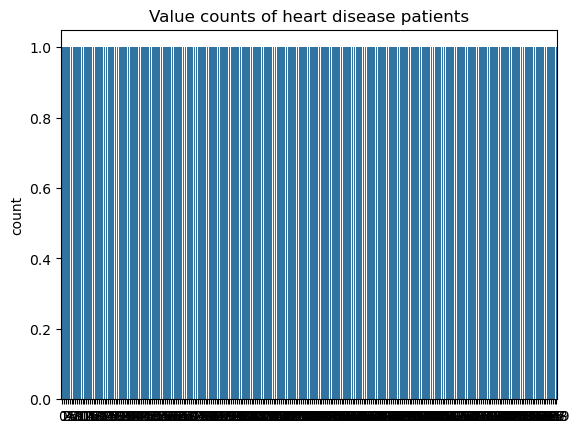

In [4]:
df = pd.read_csv('data/heart_v2.csv')
print(df.head())
sns.countplot(df['heart disease'])
plt.title('Value counts of heart disease patients')
plt.show()

**Putting feature variable to X and Target variable to y**

In [6]:
X = df.drop('heart disease', axis=1)
y = df['heart disease']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

**Doing hyperparameter tuning for Random Forest using GridSearchCV and fit the data**

In [19]:
from sklearn.ensemble import RandomForestClassifier
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
                          param_grid=params,
                          cv=4,
                          n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train, y_train)
grid_search.best_score_
rf_best = grid_search.best_estimator_
rf_best

Fitting 4 folds for each of 180 candidates, totalling 720 fits


,n_estimators,10
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


[Text(0.4375, 0.9, 'age <= 54.5\ngini = 0.496\nsamples = 122\nvalue = [103, 86]\nclass = Disease'),
 Text(0.1875, 0.7, 'sex <= 0.5\ngini = 0.395\nsamples = 55\nvalue = [62, 23]\nclass = Disease'),
 Text(0.3125, 0.8, 'True  '),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 13\nvalue = [19, 0]\nclass = Disease'),
 Text(0.25, 0.5, 'BP <= 127.0\ngini = 0.454\nsamples = 42\nvalue = [43, 23]\nclass = Disease'),
 Text(0.125, 0.3, 'BP <= 115.0\ngini = 0.49\nsamples = 20\nvalue = [16, 12]\nclass = Disease'),
 Text(0.0625, 0.1, 'gini = 0.49\nsamples = 10\nvalue = [8, 6]\nclass = Disease'),
 Text(0.1875, 0.1, 'gini = 0.49\nsamples = 10\nvalue = [8, 6]\nclass = Disease'),
 Text(0.375, 0.3, 'cholestrol <= 243.5\ngini = 0.411\nsamples = 22\nvalue = [27, 11]\nclass = Disease'),
 Text(0.3125, 0.1, 'gini = 0.48\nsamples = 12\nvalue = [12, 8]\nclass = Disease'),
 Text(0.4375, 0.1, 'gini = 0.278\nsamples = 10\nvalue = [15, 3]\nclass = Disease'),
 Text(0.6875, 0.7, 'sex <= 0.5\ngini = 0.478\nsamples = 67\nvalu

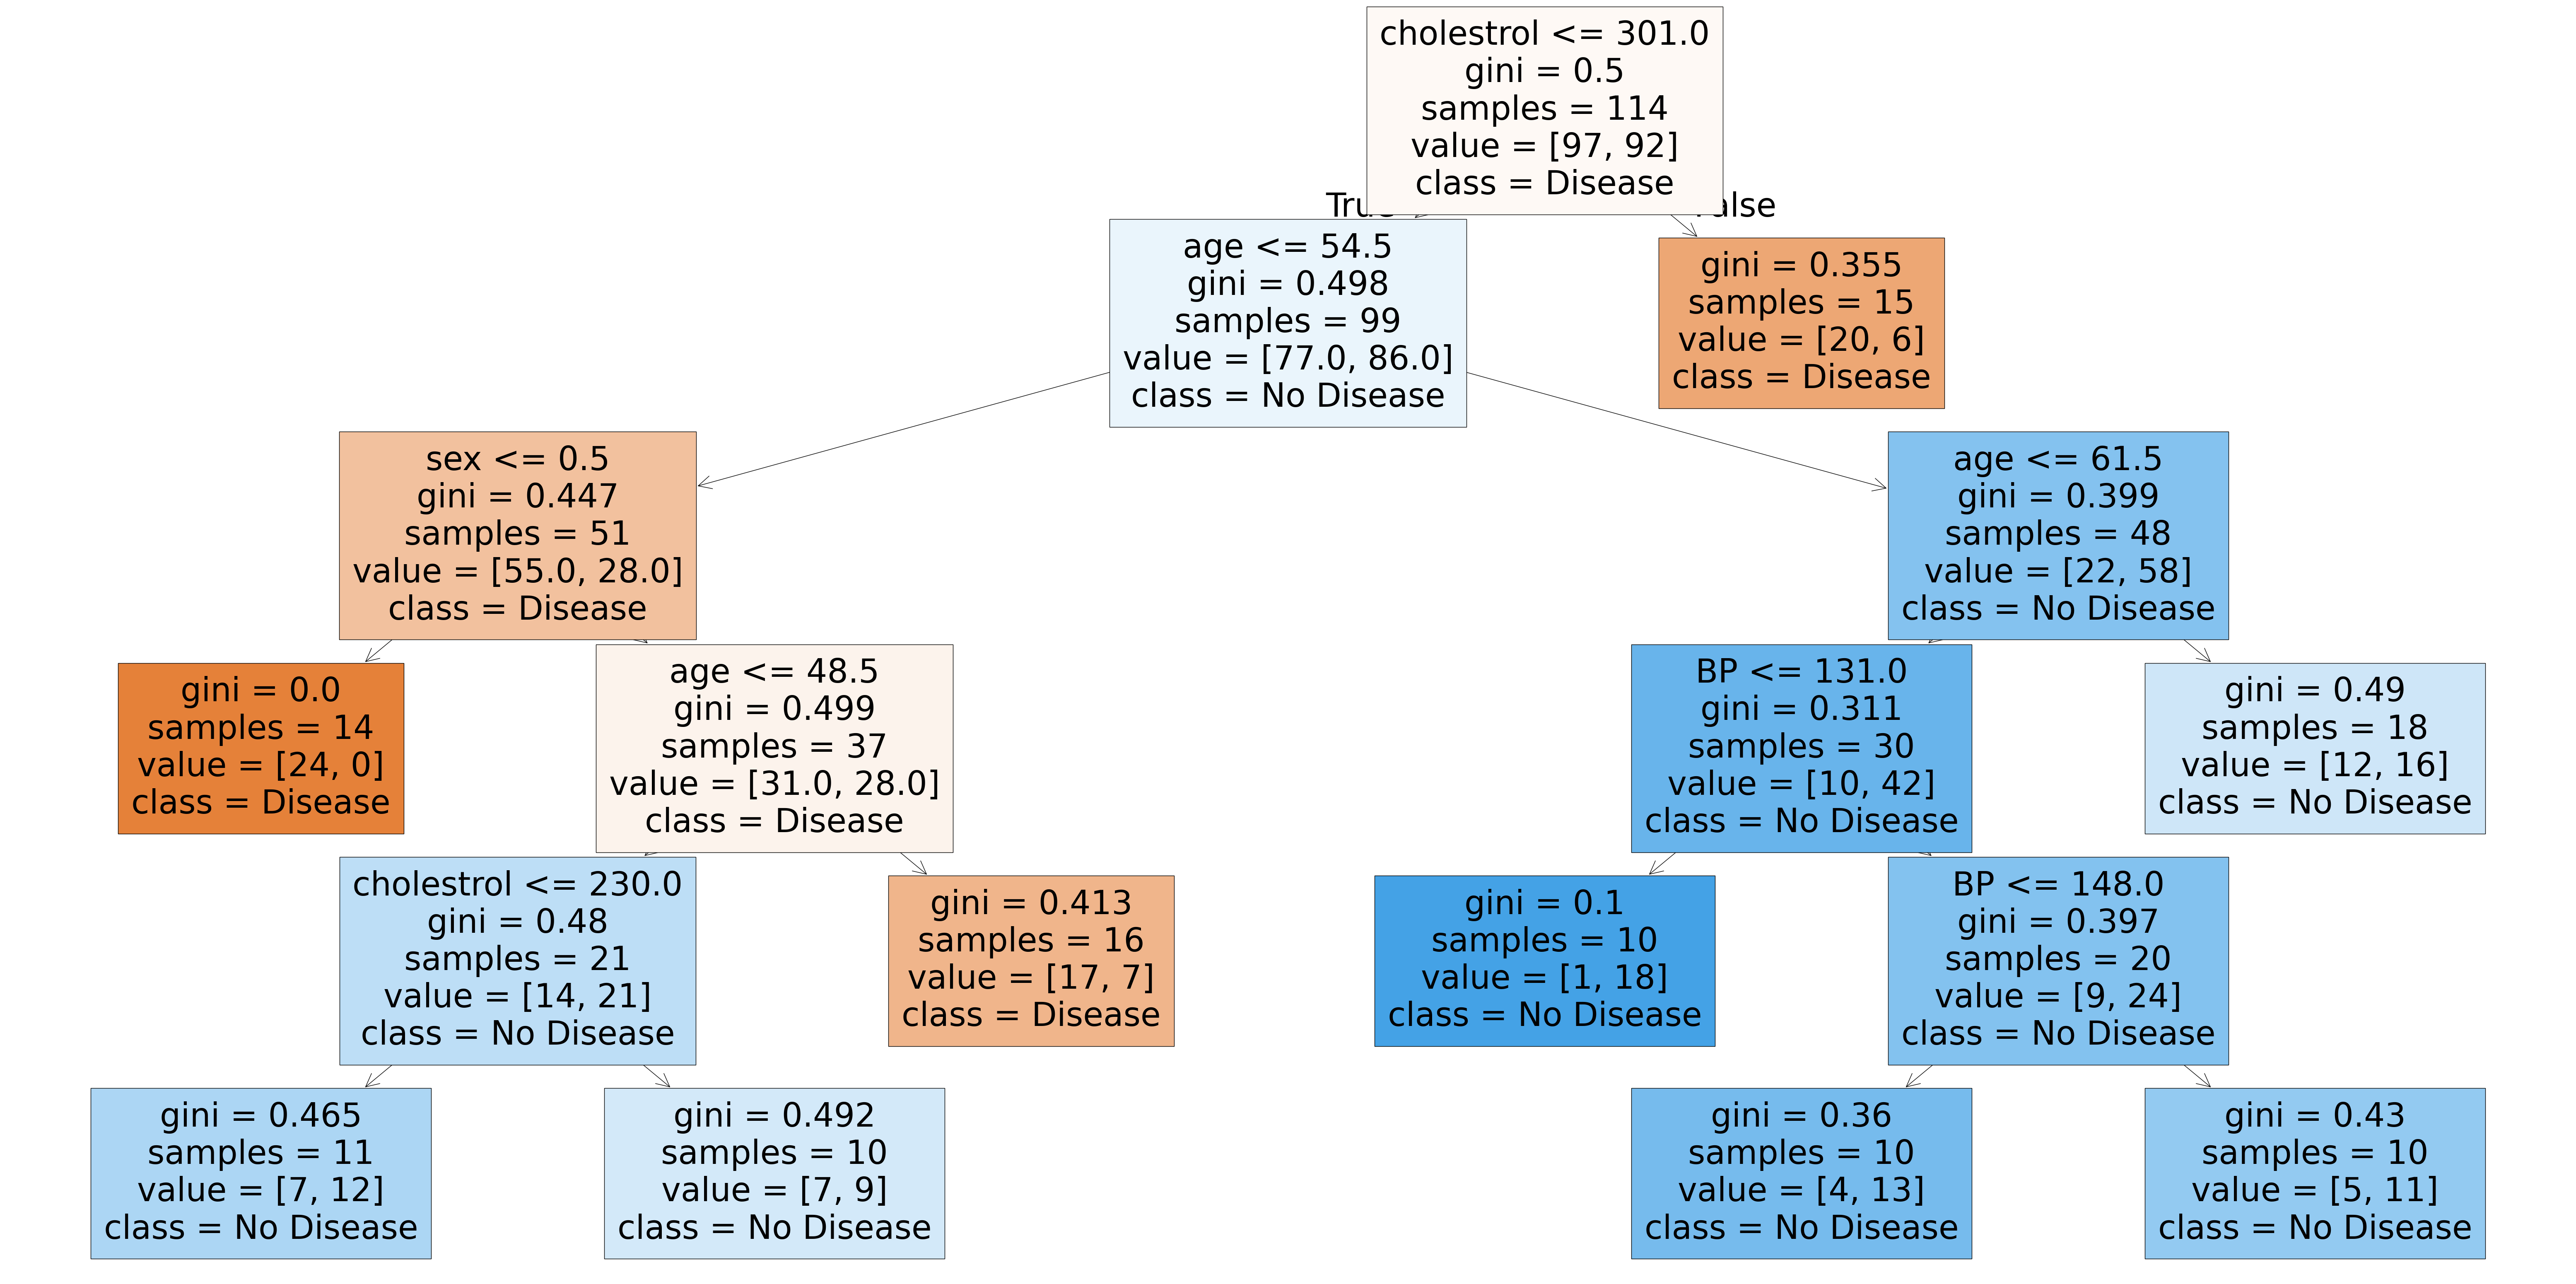

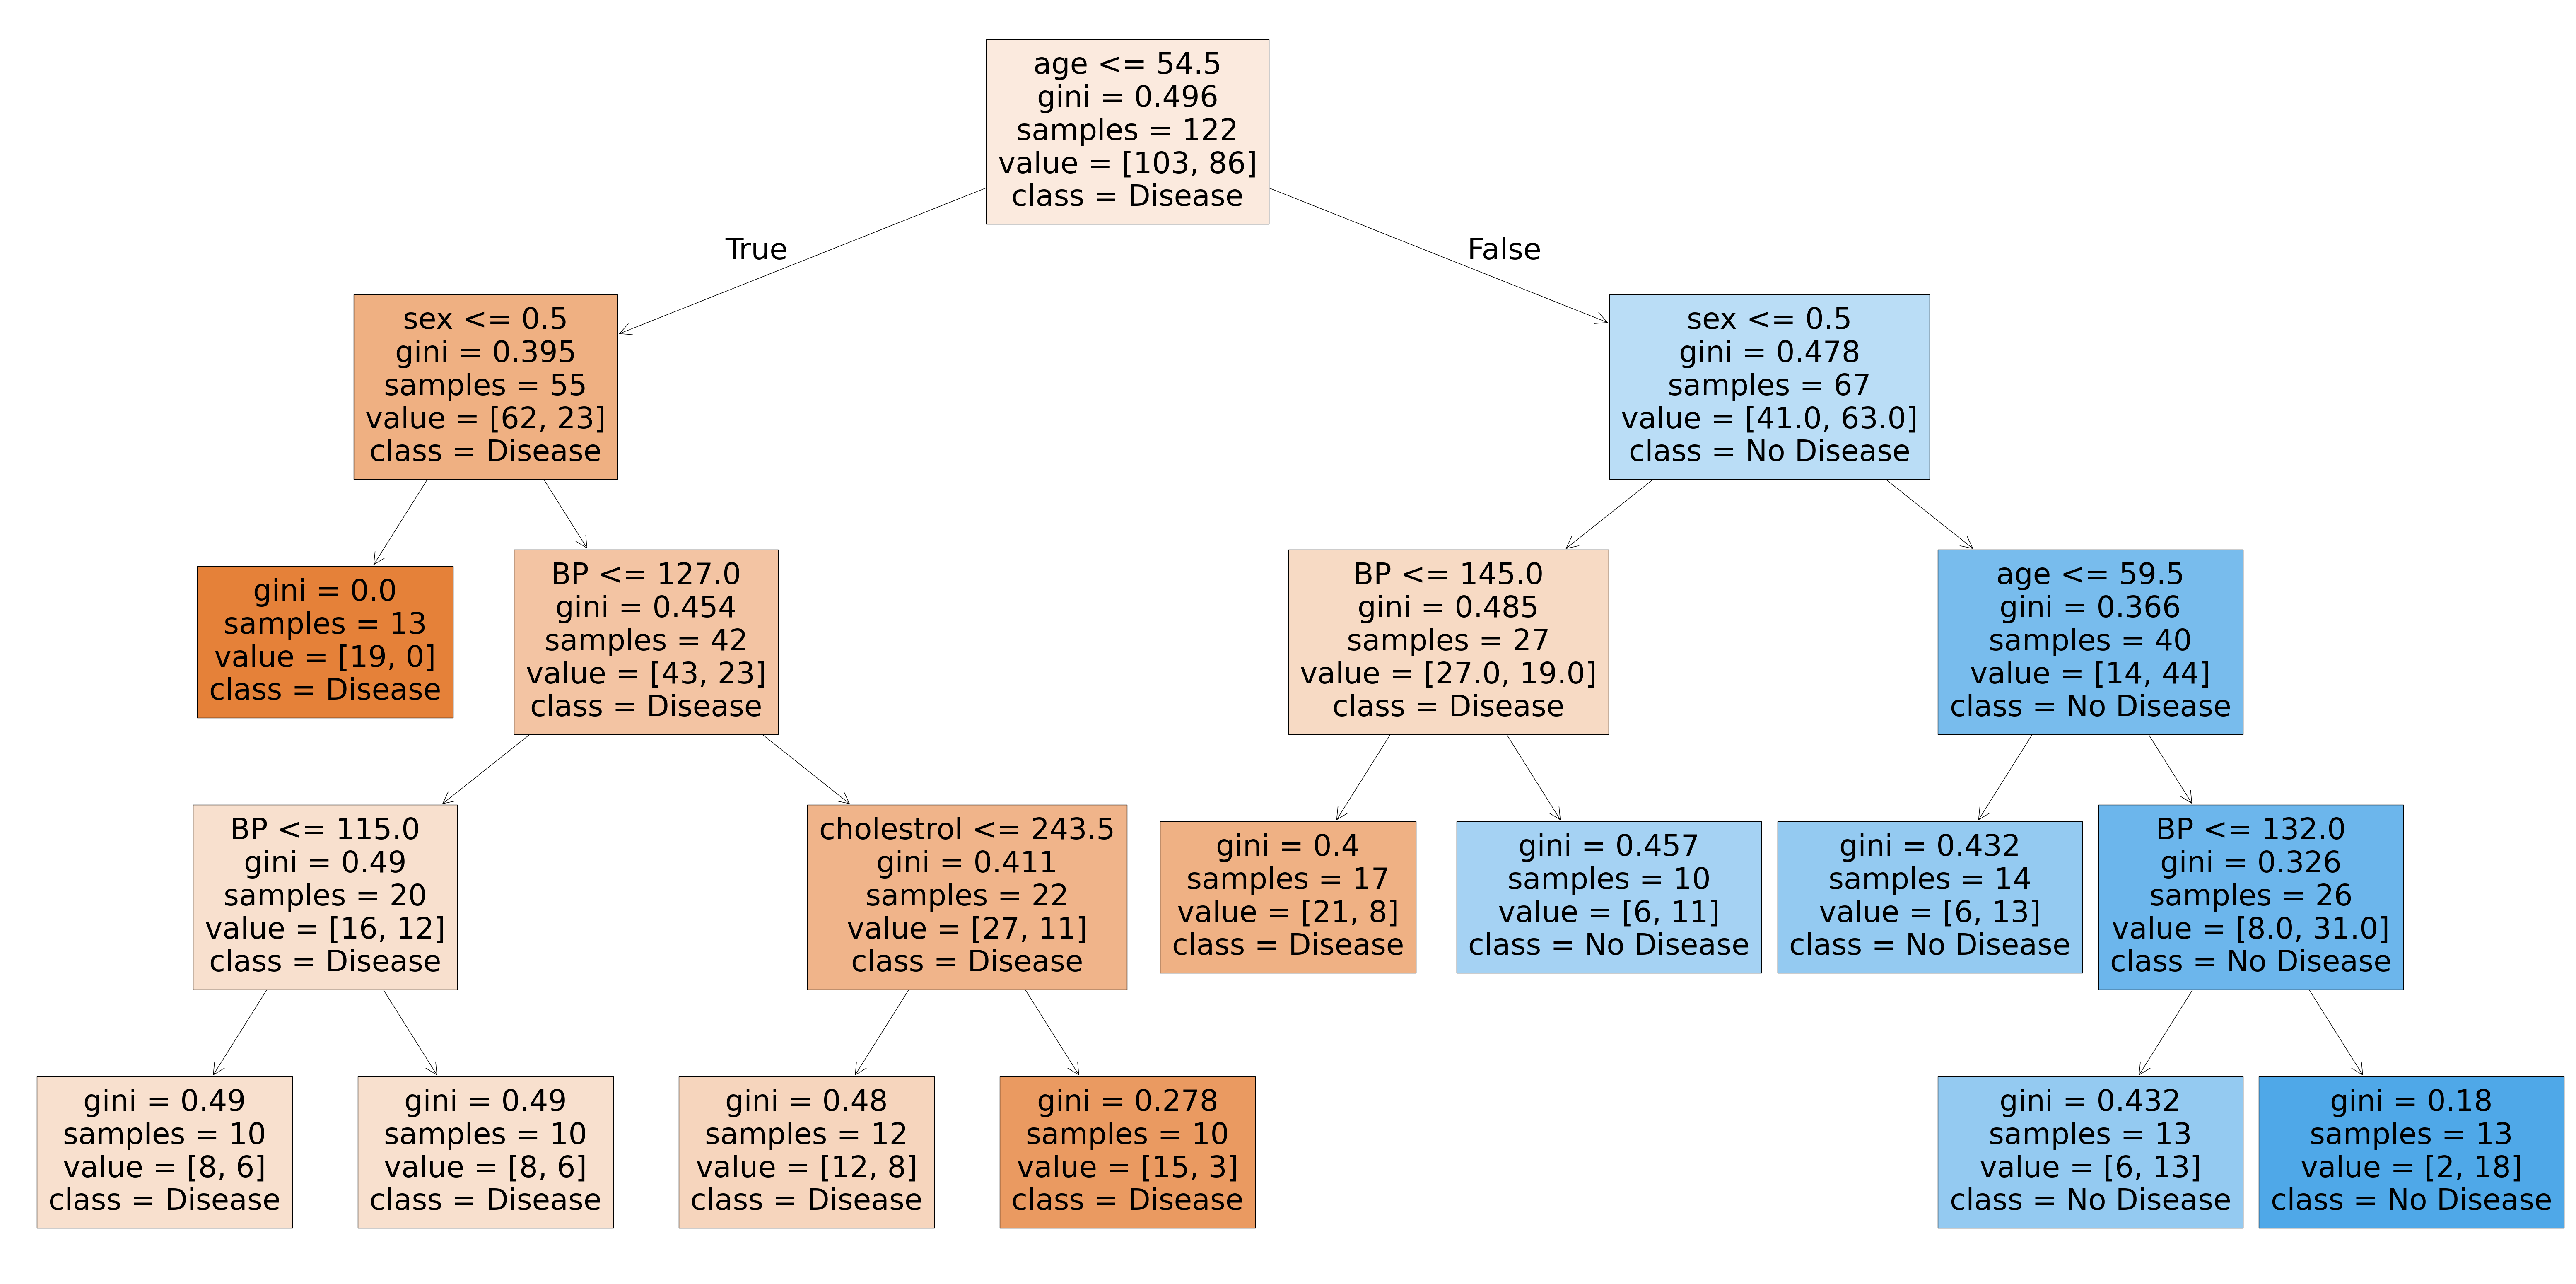

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names=X.columns,class_names=['Disease','No Disease'],filled=True)
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names=X.columns,class_names=['Disease','No Disease'],filled=True)

In [18]:
rf_best.feature_importances_
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,age,0.461285
1,sex,0.218085
3,cholestrol,0.188884
2,BP,0.131746


#### Boosting
A boosting algorithm combines multiple simple models (also known as weak learners or base estimators) to generate the final output

4 Boostring Algorithms you should know: GBM, XGBoost, LightGBM and CatBoost.

XGBoost is a powerful boosting algorithm

In [22]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

train = pd.read_csv('data/train_modified.csv')
print(train.head())
print(train['Disbursed'].value_counts())
target = 'Disbursed'
IDcol = 'ID'
predictors = [x for x in train.columns if x not in [target, IDcol]]
param_test = {
    'reg_alpha':[1e-5, 1e-2, 0.1, 100]
}
gsearch = GridSearchCV(estimator=XGBClassifier(
    learning_rate=0.1,
    n_estimators=10,
    max_depth=5,
    min_child_weight=2,
    gamma=0.1,
    subsample=0.85,
    colsample_bytree=0.8,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27),
  param_grid=param_test,
  scoring='roc_auc',
  n_jobs=4,
  cv=2,
  verbose=10)
gsearch.fit(train[predictors], train[target])
print("Best Grid Search Parameters: ", gsearch.best_params_)
print('Best Grid Search Score: ', gsearch.best_score_)

   Disbursed  Existing_EMI           ID  Loan_Amount_Applied  \
0        0.0           0.0  ID000002C20             300000.0   
1        0.0           0.0  ID000004E40             200000.0   
2        0.0           0.0  ID000007H20             600000.0   
3        0.0           0.0  ID000008I30            1000000.0   
4        0.0       25000.0  ID000009J40             500000.0   

   Loan_Tenure_Applied  Monthly_Income  Var4  Var5  Age  \
0                  5.0           20000     1     0   37   
1                  2.0           35000     3    13   30   
2                  4.0           22500     1     0   34   
3                  5.0           35000     3    10   28   
4                  2.0          100000     3    17   31   

   EMI_Loan_Submitted_Missing  ...  Var2_2  Var2_3  Var2_4  Var2_5  Var2_6  \
0                           1  ...     0.0     0.0     0.0     0.0     1.0   
1                           0  ...     0.0     0.0     0.0     0.0     1.0   
2                         

/home/thuy/miniconda3/envs/myenv/lib/python3.13/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/home/thuy/miniconda3/envs/myenv/lib/python3.13/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' var

Best Grid Search Parameters:  {'reg_alpha': 0.1}
Best Grid Search Score:  0.8175852739395083


In [9]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

/home/thuy/miniconda3/envs/myenv/lib/python3.13/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


In [10]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Initialize and train the XGBoost classifier
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_clf.fit(X_train, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [12]:
# Make predictions
y_pred = xgb_clf.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Classifier Accuracy: {accuracy: .2f}")

XGBoost Classifier Accuracy:  1.00


#### Stacking
Stacking combine multiple models to improve predictive performance
1. Base Models: Training multiple models (level-0 models) on the same dataset
2. Meta Model: Using the predictions of the base models as input features for the meta-model

In [14]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

In [16]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
]
# Define meta-model
meta_model = LogisticRegression()

In [18]:
# Initialize and train the StackingClassifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_clf.fit(X_train, y_train)

,estimators,"[('rf', ...), ('svm', ...)]"
,final_estimator,LogisticRegression()
,cv,None
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2


In [19]:
# Make predictions
y_pred = stacking_clf.predict(X_test)

In [20]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {accuracy:.2f}")

Stacking Classifier Accuracy: 1.00
